# Testing raw_to_ingested.py

I've now written the function to convert the mpl files to the ingested format. This file will deal with:

For a given day:
+ load in the ingested file
+ load in the mpl files and turn them into their ingested format
+ perform a comparison of all data variables

TODO:
+ implement open_mf_mpl_inline : a function to inline open the binary mpl files without having to move them and then convert them to .nc files

## RESULTS

+ 11/02/2021 : succesful, except the .hour variable sucks. However, this is to be expected as the function was developed with this data as reference.

In [1]:
# imports
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import datetime

import os

from raw_to_ingested import raw_to_ingested

In [2]:
# directory setup

dir_raw = '/home/users/eeasm/_scripts/ICESat2/data/cycle10/mpl/mpl'
date = datetime.date(2021,2,11)

fname_ingested = fname = '/home/users/eeasm/_scripts/ICESat2/src/mpl/calibration/smtmplpolX1.a1.20210211.000000.cdf'

## Datasets

In [3]:
ds_raw = raw_to_ingested(dir_raw,date)
ds_raw

<xarray.Dataset>
Dimensions:          (time: 17280, height: 1200)
Coordinates:
  * time             (time) datetime64[ns] 2021-02-11T00:00:02 ... 2021-02-11...
  * height           (height) float64 -3e+03 -2.985e+03 ... 1.496e+04 1.497e+04
Data variables: (12/19)
    base_time        datetime64[ns] dask.array<chunksize=(), meta=np.ndarray>
    time_offset      (time) timedelta64[ns] 00:00:00 00:00:05 ... 23:59:53
    hour             (time) float32 4.481e+05 4.481e+05 ... 4.481e+05 4.481e+05
    nshots           (time) int32 12500 12500 12500 12500 ... 12500 12500 12500
    rep_rate         (time) int32 2500 2500 2500 2500 ... 2500 2500 2500 2500
    energy           (time) float32 4.45 4.45 4.446 4.445 ... 4.42 4.42 4.42
    ...               ...
    initial_cbh      (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    backscatter_1    (time, height) float32 0.0 0.0 0.0016 ... 0.0 0.0016 0.0
    backscatter_2    (time, height) float32 0.0 0.0 0.0032 0.0 ... 0.0 0.0 0.0
    lat              float64 72.6
    lon              float64 -38.42
    alt              int64 3200

In [4]:
ds_ingested = xr.open_dataset(fname_ingested)
ds_ingested

<xarray.Dataset>
Dimensions:          (time: 17280, height: 1200)
Coordinates:
  * height           (height) float32 -2.998 -2.983 -2.968 ... 14.94 14.96 14.97
Dimensions without coordinates: time
Data variables: (12/19)
    base_time        datetime64[ns] ...
    time_offset      (time) timedelta64[ns] ...
    hour             (time) float32 ...
    nshots           (time) int32 ...
    rep_rate         (time) int32 ...
    energy           (time) float32 ...
    ...               ...
    initial_cbh      (time) float32 ...
    backscatter_1    (time, height) float32 ...
    backscatter_2    (time, height) float32 ...
    lat              float32 ...
    lon              float32 ...
    alt              float32 ...
Attributes:
    Date_created:              Mon Mar 01 16:43:44 2021 UTC
    Ingest_version:            $Id: dave_mpl.polarization.c,v 1.8 2015/09/24 ...
    comment:                   DOE Atmospheric Radiation Measurement (ARM) Mi...
    Author:                    Dave Turner, NOAA National Severe Storms Labor...
    instrument_serial_number:  108
    instrument_version:        413
    backscatter_comment:       See Flynn et al. 2007 Optics Express paper for...

## Comparisons

### time vars

PROBLEMS:
+ `hour`: seems to be off by a concistent factor of a few thousand

In [7]:
# base_time
k = 'base_time'
print(ds_raw[k].values)
print(ds_ingested[k].values)

print(ds_raw[k].values - ds_ingested[k].values)

2021-02-11T00:00:02.000000000
2021-02-11T00:00:02.000000000
0 nanoseconds


ValueError: Unknown format code 'f' for object of type 'str'

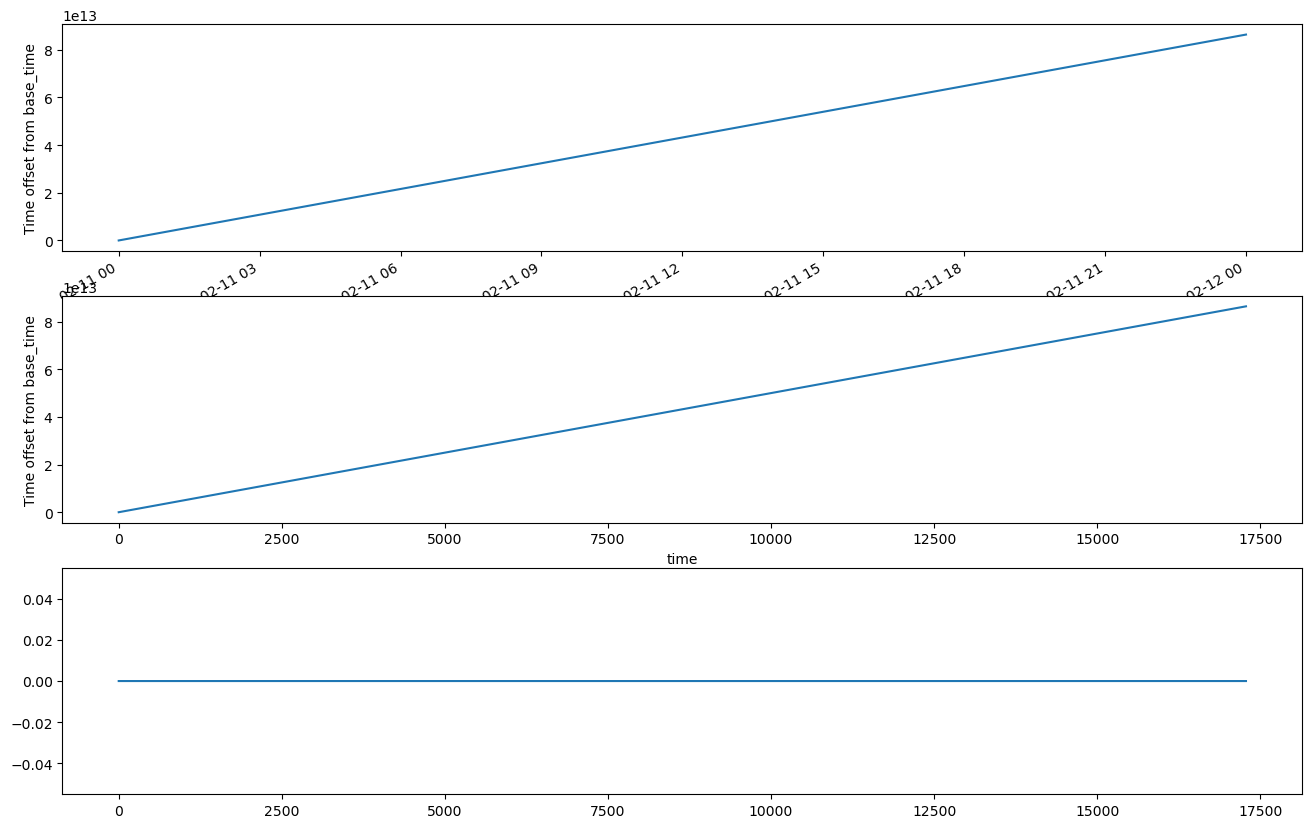

In [9]:
k = 'time_offset'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

difference: max = 448066.3750000000000000
difference: min = 448066.3125000000000000


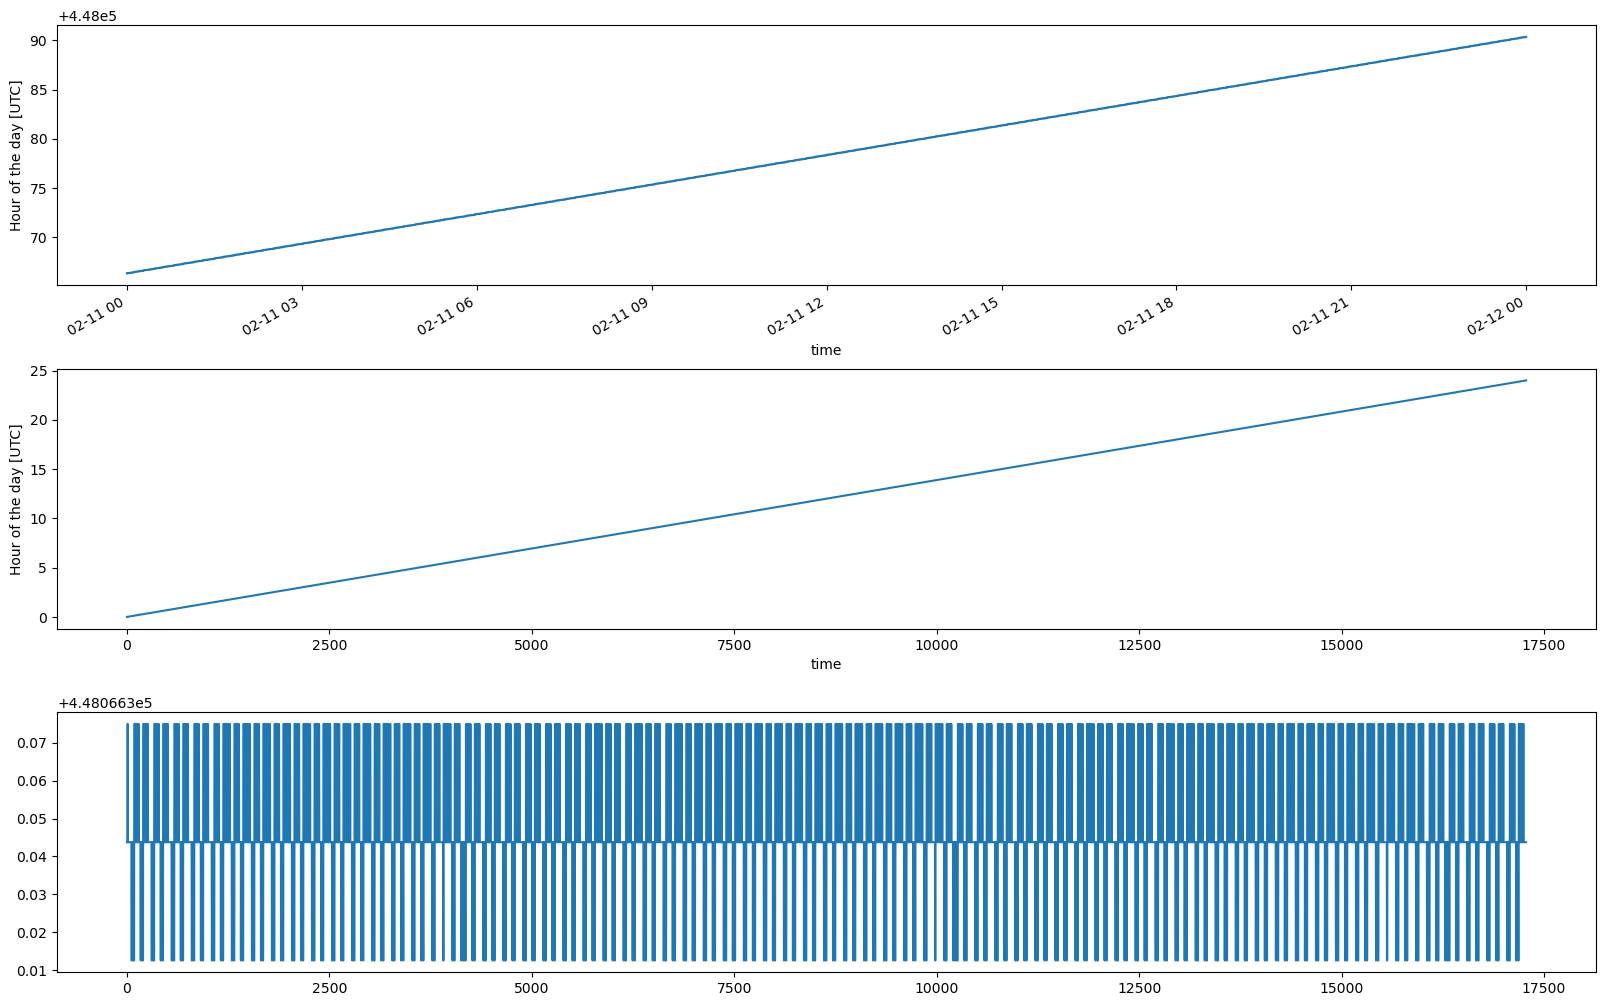

In [11]:
k = 'hour'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)

fig.tight_layout(pad=0.5)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

### general vars
`nshots`, `rep_rate`, `energy`, `initial_cbh`

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


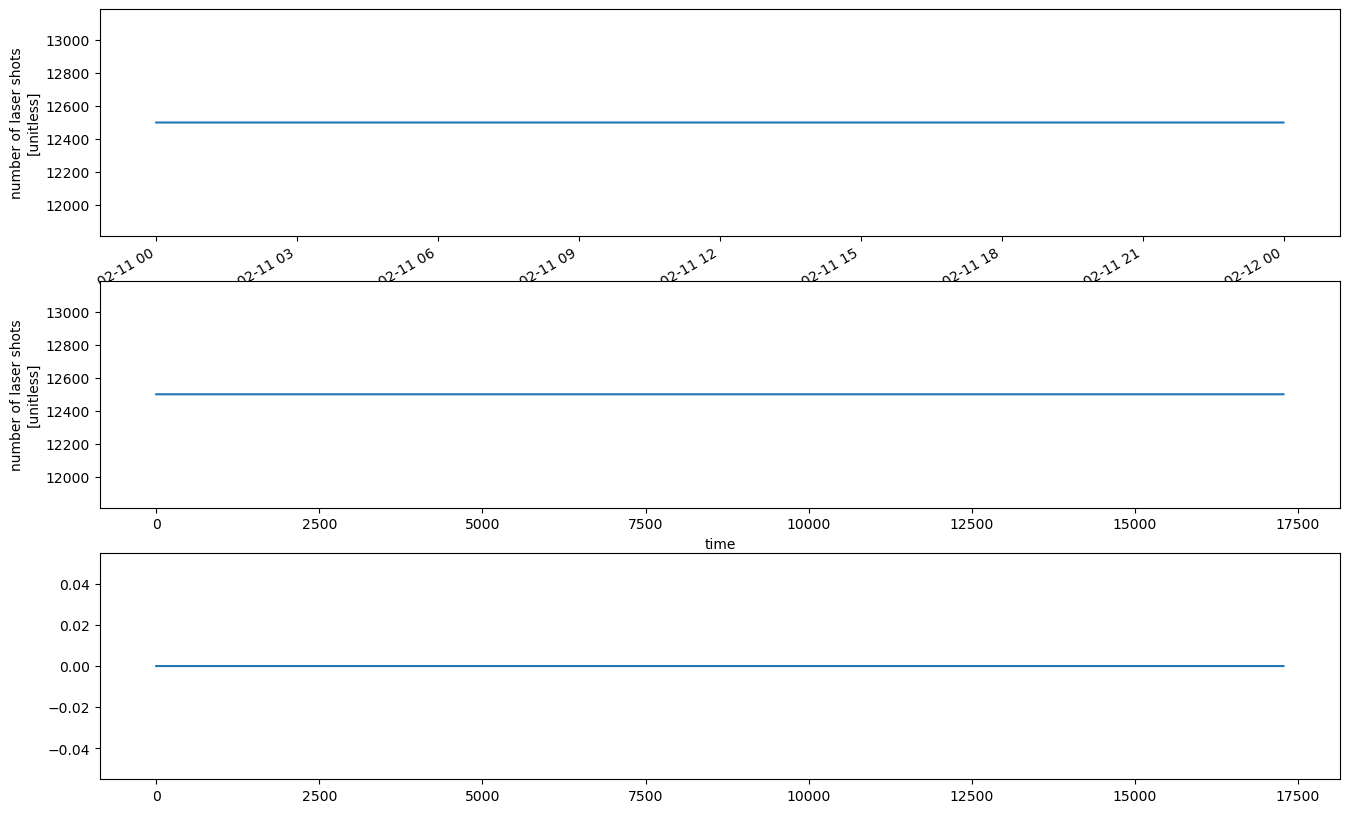

In [12]:
k = 'nshots'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


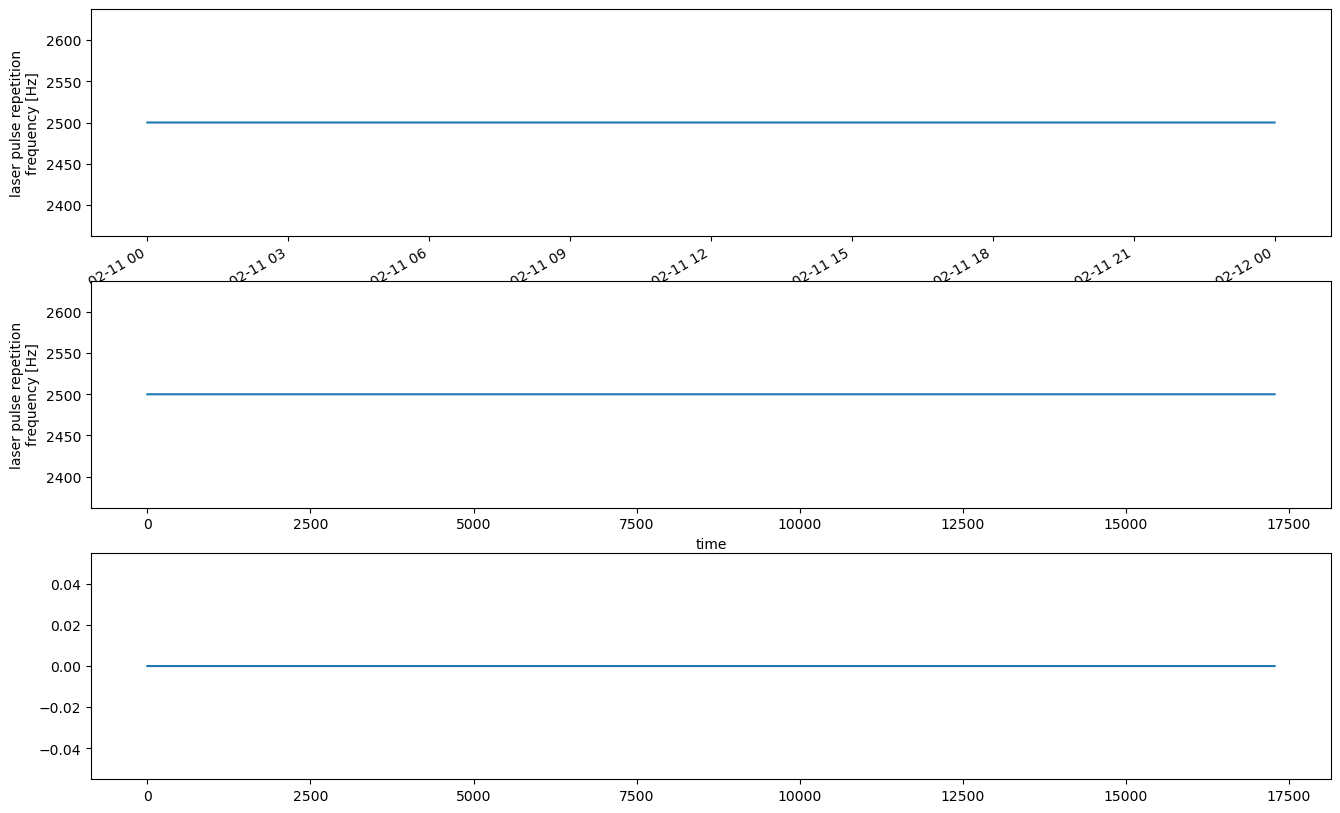

In [13]:
k = 'rep_rate'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


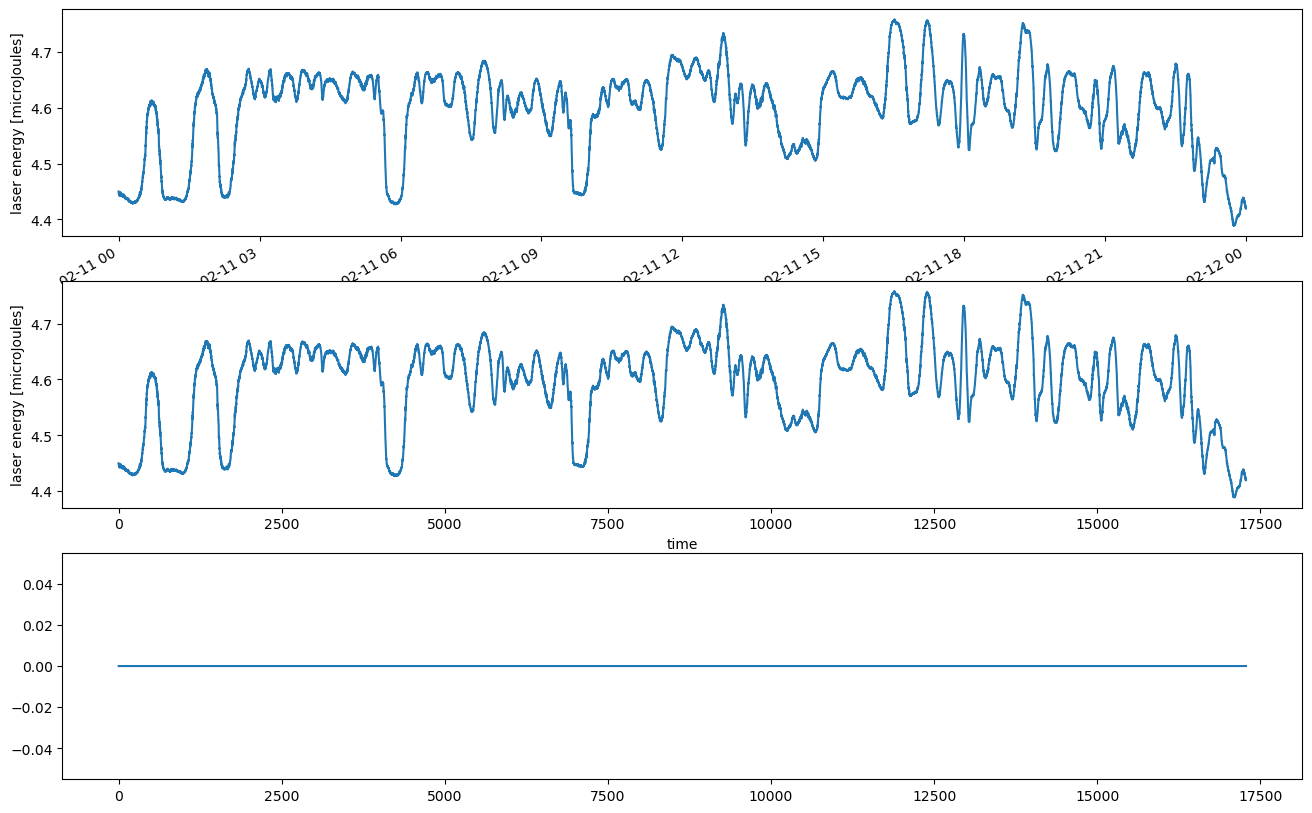

In [14]:
k = 'energy'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


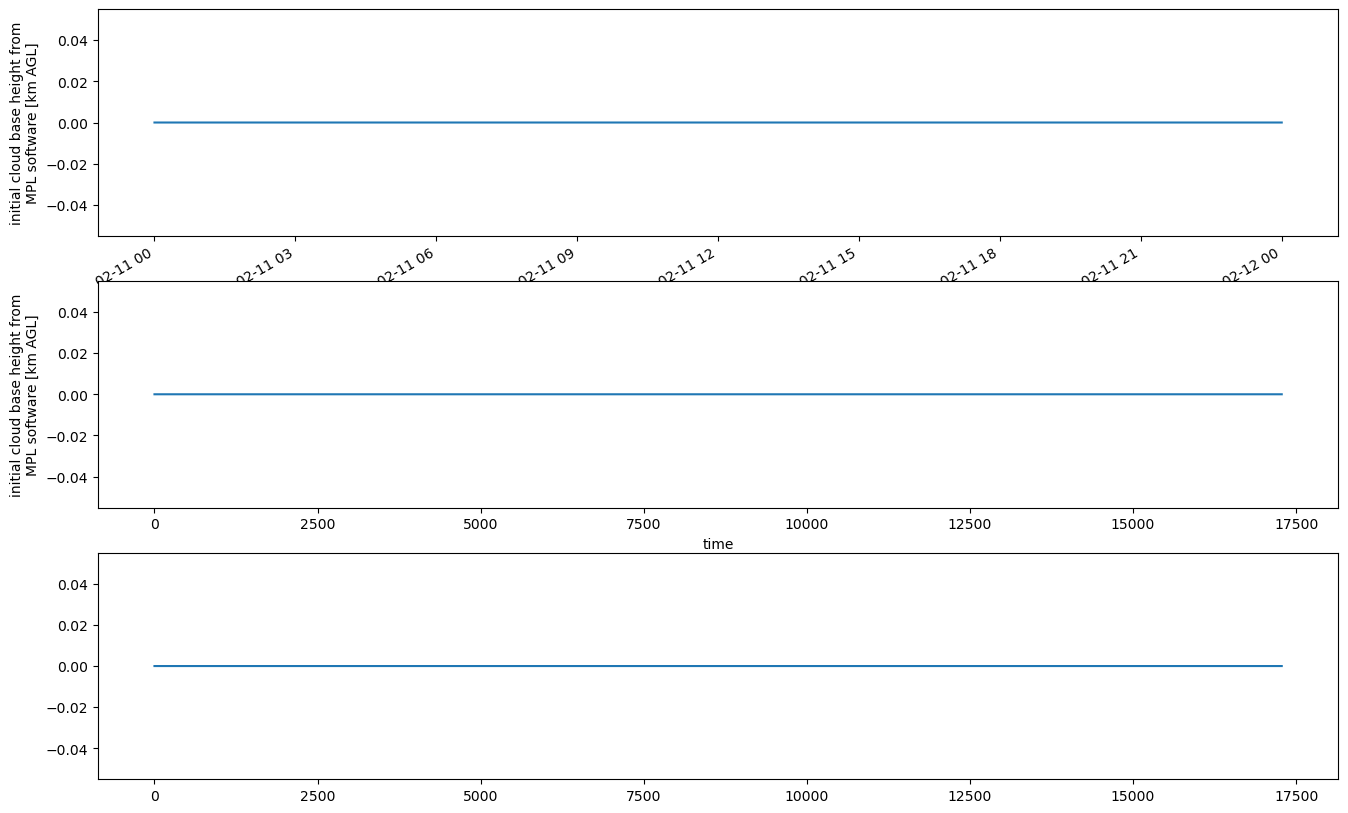

In [15]:
k = 'initial_cbh'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

### temperature vars

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


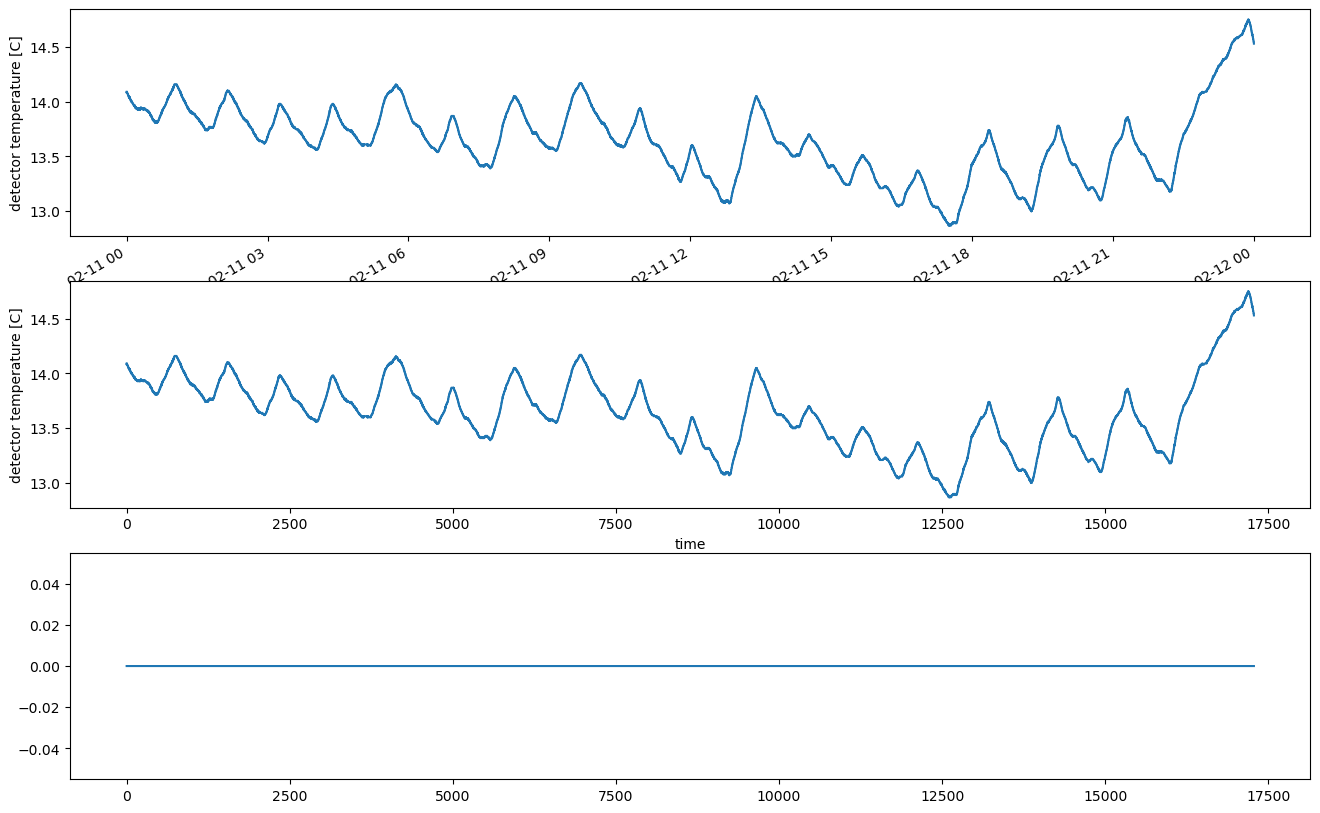

In [16]:
k = 'temp_detector'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


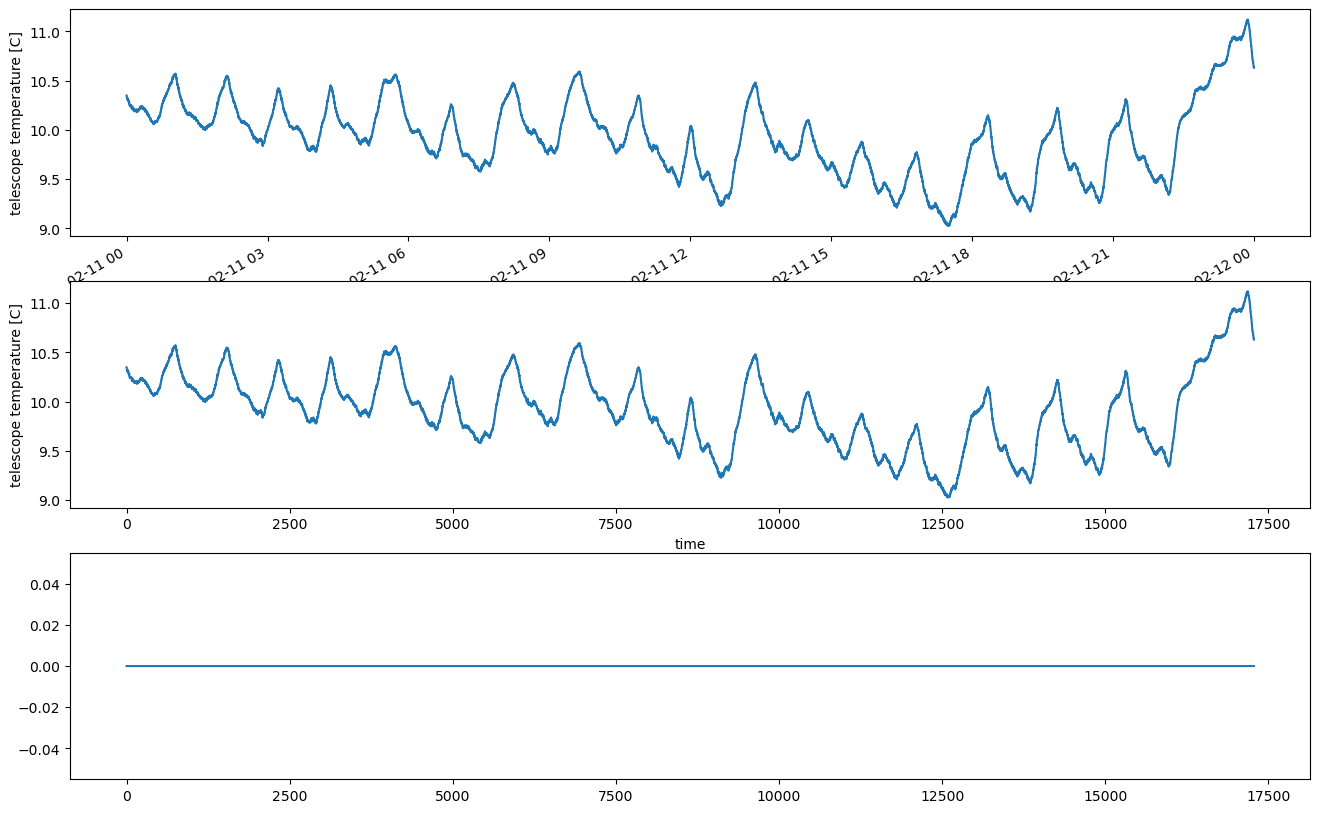

In [17]:
k = 'temp_telescope'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


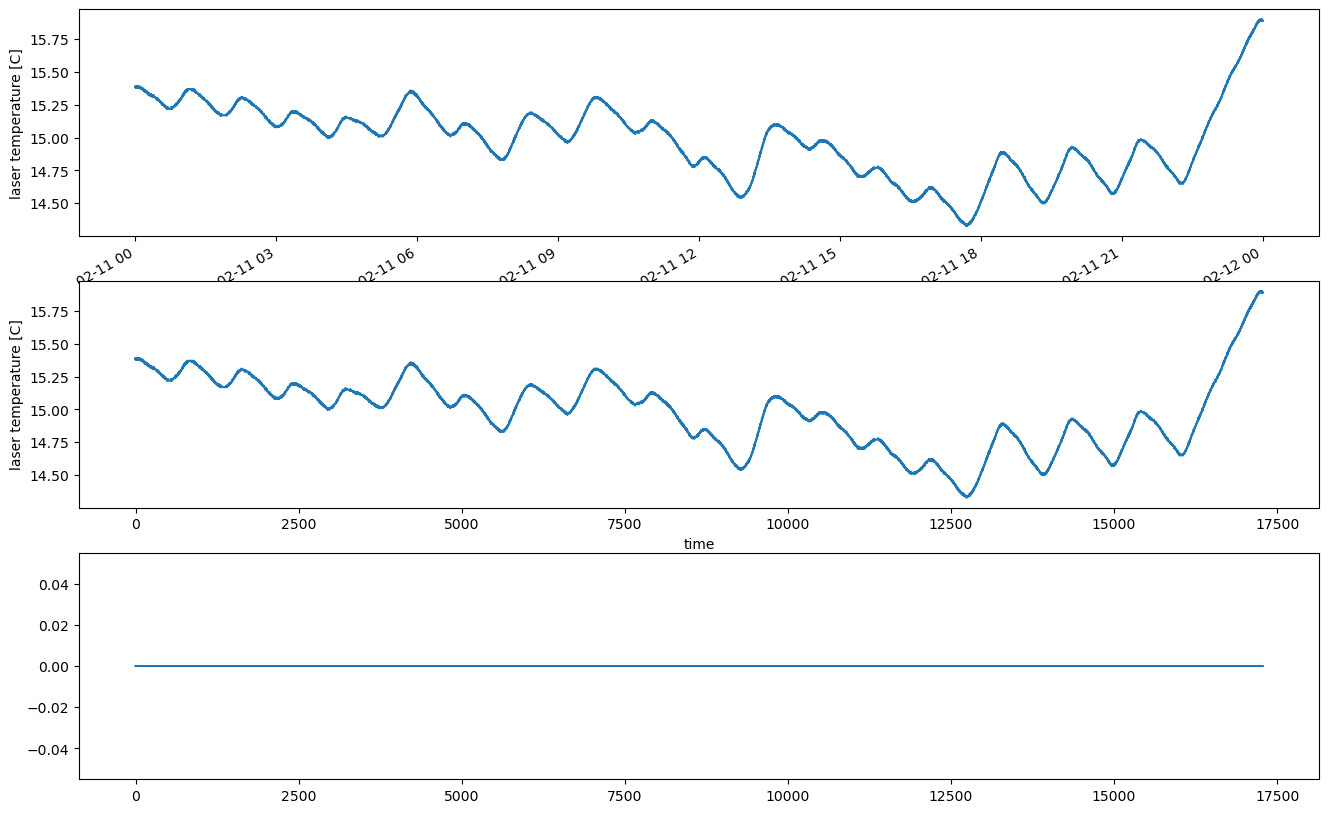

In [18]:
k = 'temp_laser'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

### background vars

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


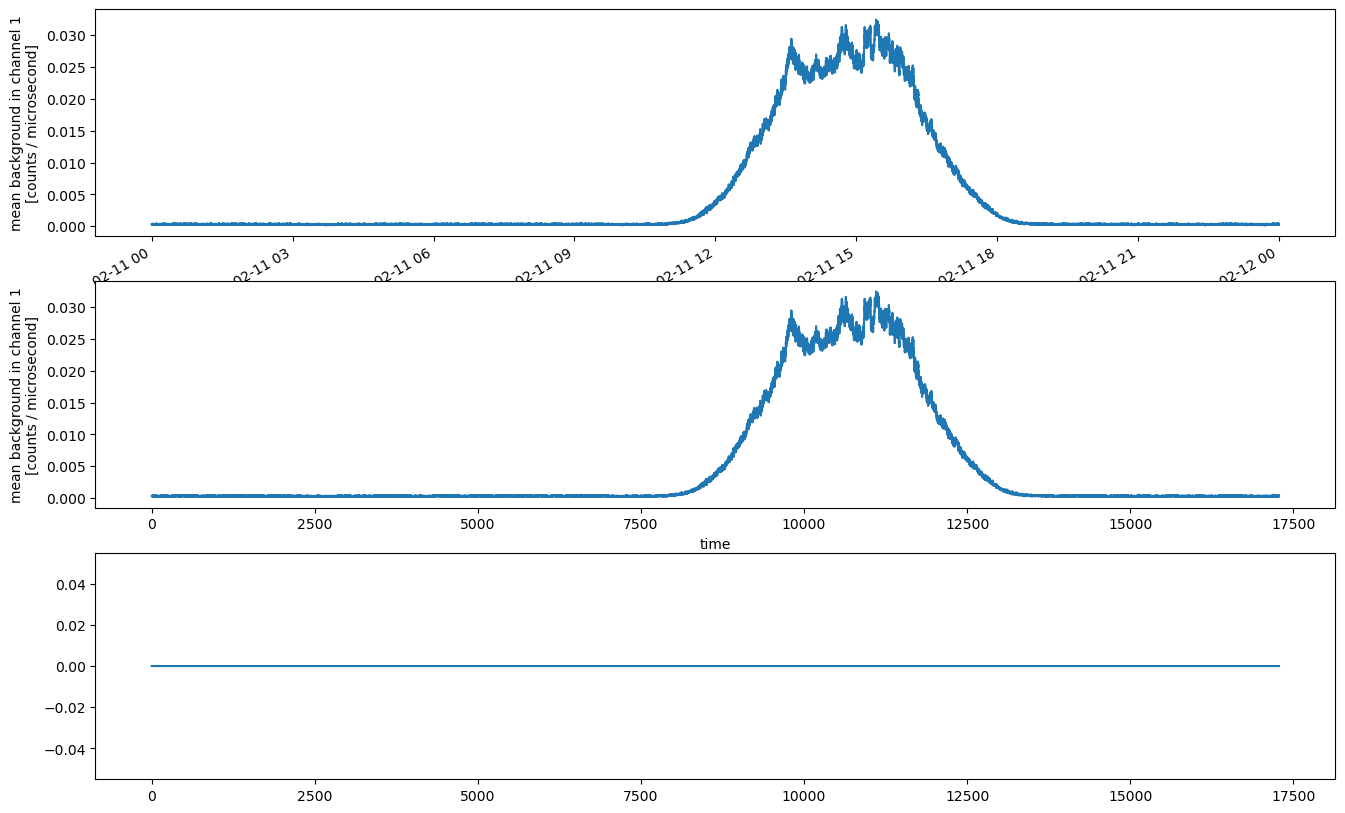

In [22]:
k = 'mn_background_1'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


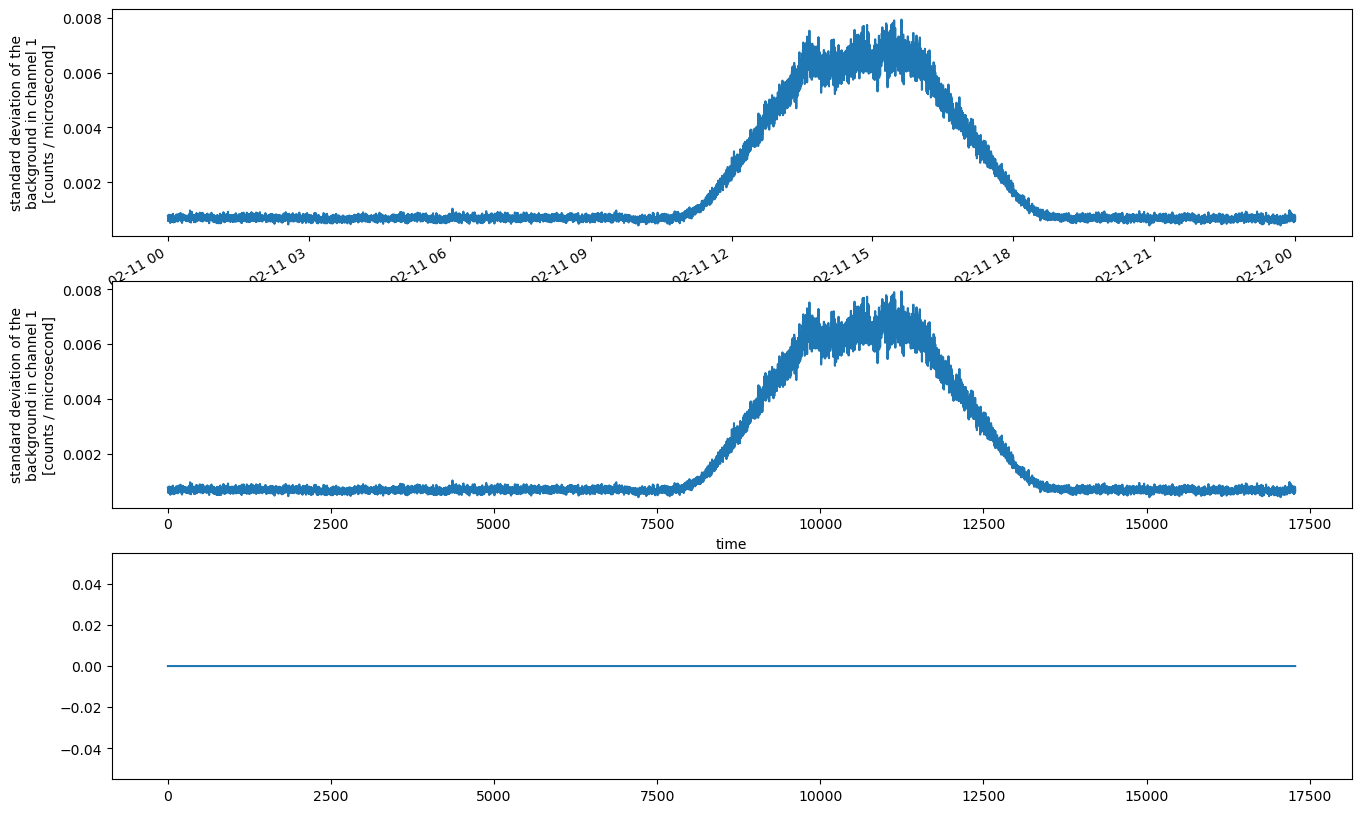

In [21]:
k = 'sd_background_1'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


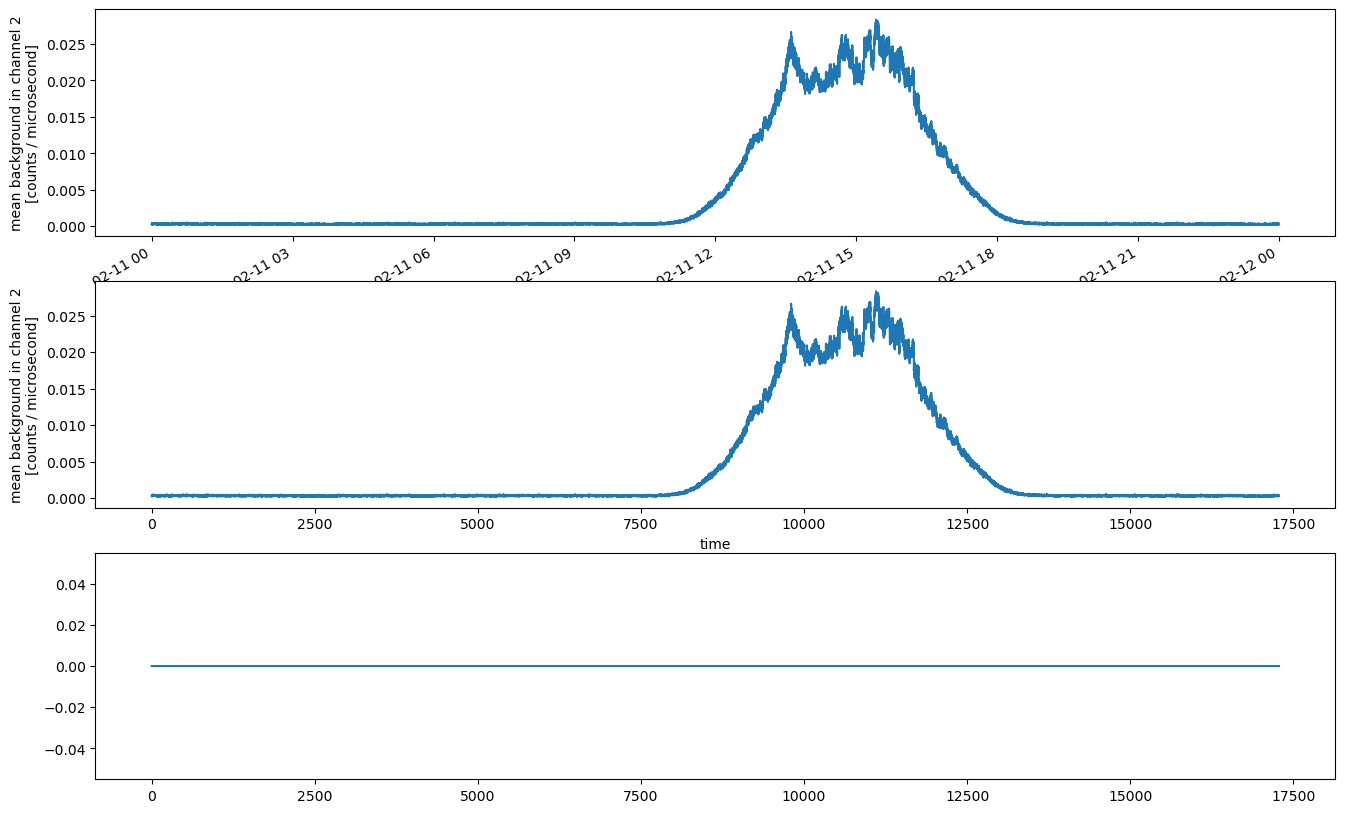

In [20]:
k = 'mn_background_2'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


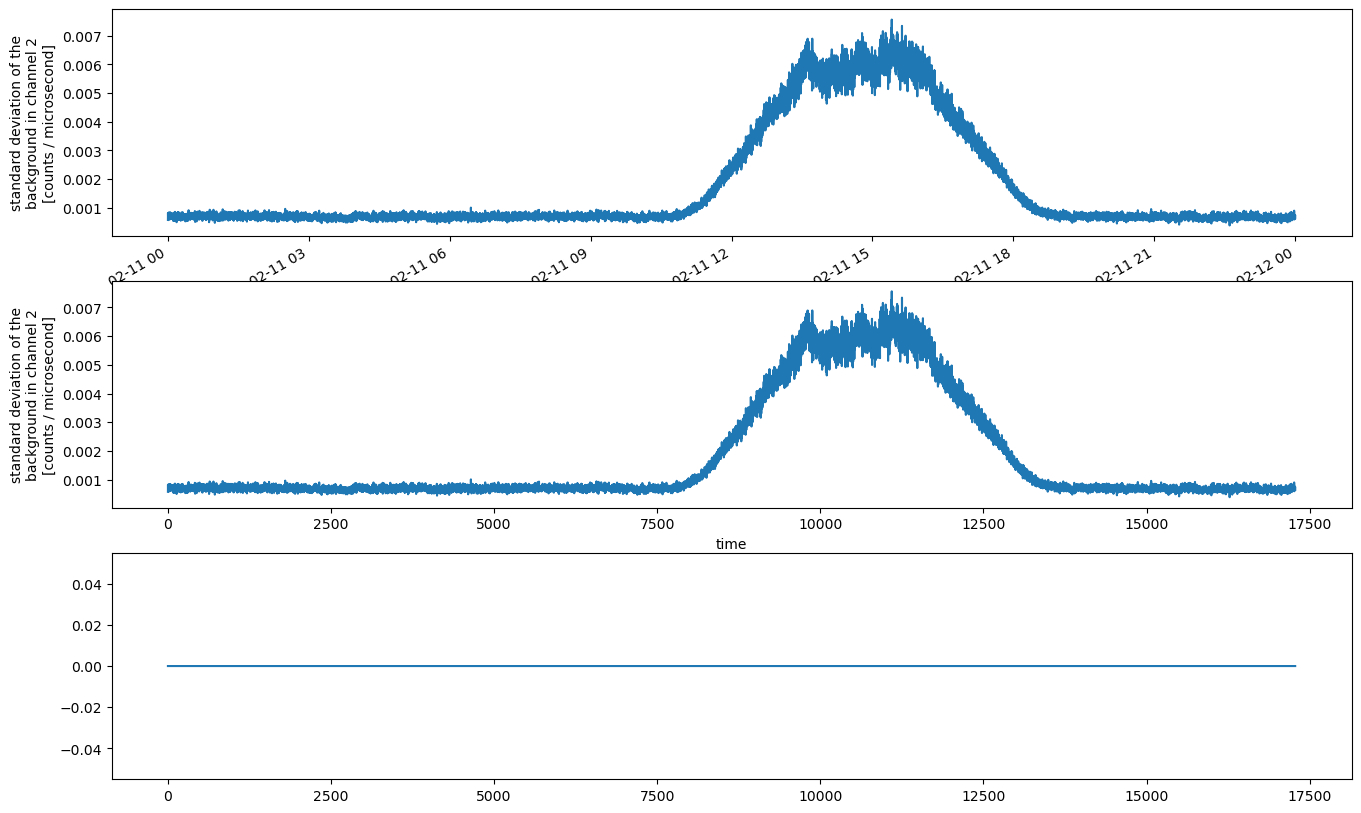

In [19]:
k = 'sd_background_2'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0])
ds_ingested[k].plot(ax=axs[1])

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

### backscatter vars

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


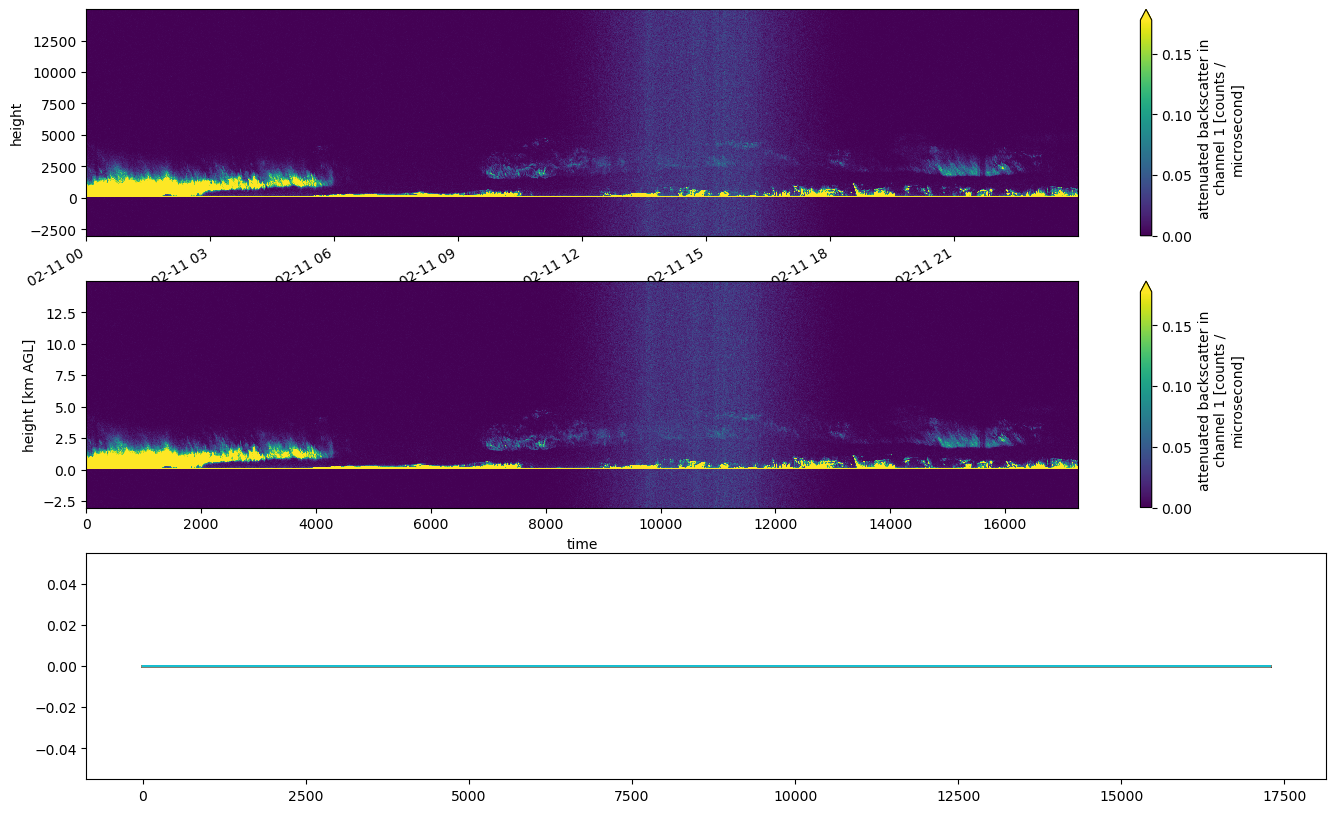

In [25]:
k = 'backscatter_1'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0], robust=True, x='time')
ds_ingested[k].plot(ax=axs[1], robust=True, x='time')

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


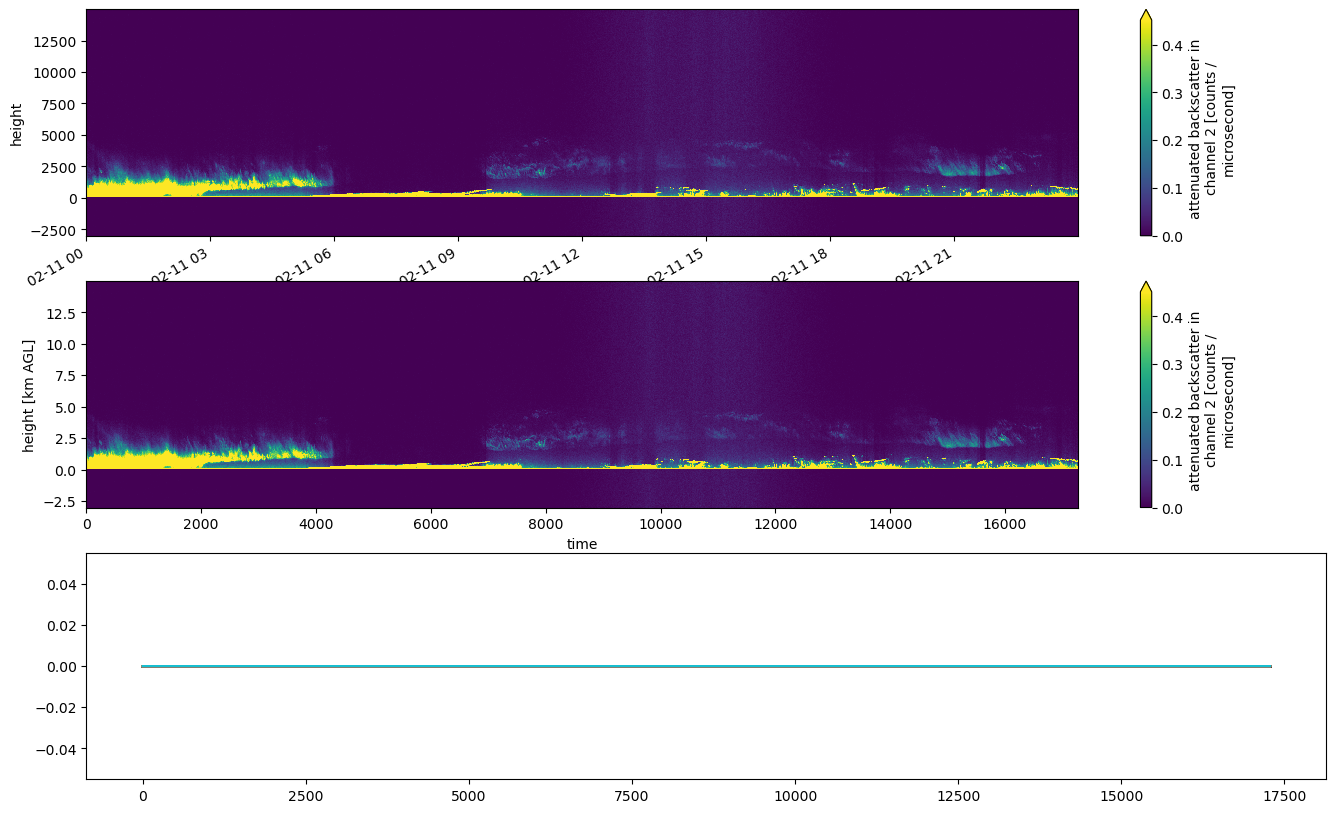

In [26]:
k = 'backscatter_2'
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw[k].plot(ax=axs[0], robust=True, x='time')
ds_ingested[k].plot(ax=axs[1], robust=True, x='time')

vals = (ds_raw[k].values - ds_ingested[k].values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

### lat, lon, alt vars

In [28]:
# base_time
k = 'base_time'
print(ds_raw[k].values)
print(ds_ingested[k].values)

print(ds_raw[k].values - ds_ingested[k].values)

2021-02-11T00:00:02.000000000
2021-02-11T00:00:02.000000000
0 nanoseconds


In [29]:
k = 'lon'

print(ds_raw[k].values)
print(ds_ingested[k].values)

print(ds_raw[k].values - ds_ingested[k].values)

-38.42197
-38.42197
3.674316388924126e-07


In [30]:
k = 'alt'

print(ds_raw[k].values)
print(ds_ingested[k].values)

print(ds_raw[k].values - ds_ingested[k].values)

3200
3200.0
0.0
